# Wordle Bot Evaluation

In [1]:
import player
import stats
import random
import words

In [2]:
# Get list of possible solutions
allWordsFile = 'word_lists/all-words.txt'
solWordsFile = 'word_lists/words.txt'
pastWordsFile = 'word_lists/previous-answers.txt'

allWords = stats.getWordList(allWordsFile)
solWords = stats.getWordList(solWordsFile)
pastWords = stats.getWordList(pastWordsFile)

## Version 1.0

In [3]:
# Compute embedding vectors for each letter
allLetters = stats.getLetterDistrubution(allWords)
solLetters = stats.getLetterDistrubution(solWords)

# Calculate word scores
allWordsScores = stats.getWordScores(allWords, allLetters)
solWordScores = stats.getWordScores(solWords, solLetters)

In [4]:
attemptsTotal = 0
attemptsWins = 0
wins = 0
randSample = random.sample(range(len(solWords)), len(solWords))

for randIndex in randSample:
    # Grab a random solution word
    randAnswer = solWords[randIndex]

    # Have player solve wordle
    states = []
    guesses = []
    for attempt in range(1, 7):
        guess = player.computeGuess(solWordScores, attempt, guesses, states)

        guesses.append(guess)

        outcome = player.solve(randAnswer, guess)

        states.append(outcome["verdict"])

        if outcome["win"]:
            wins += 1
            attemptsWins += len(states)
            break
    
    attemptsTotal += len(states)

#### Score Distribution for Solution Words

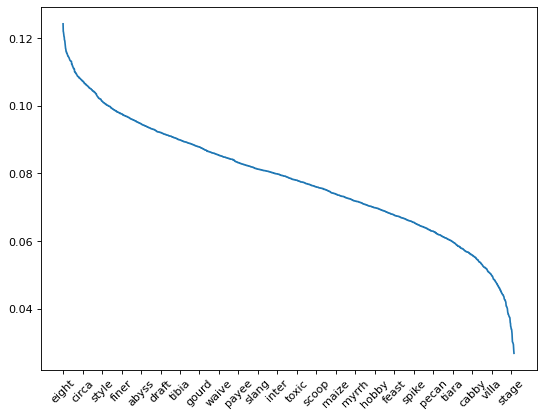

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(solWords, list(solWordScores.values()))
plt.xticks(np.arange(0, len(solWords), 100), rotation = 45) # Only showing every 100th word
plt.show()

### Performance

In [6]:
avgAttemptsTotal = attemptsTotal / len(solWords)
avgAttemptsWins = attemptsWins / wins
print("Average Number of Attempts for All Games:", avgAttemptsTotal)
print("Average Number of Attempts for Only Winning Games:", avgAttemptsWins)
print("Total Number of Wins:", wins)
print("Win Percentage:", wins/len(solWords))

Average Number of Attempts for All Games: 3.9490280777537796
Average Number of Attempts for Only Winning Games: 3.8991150442477878
Total Number of Wins: 2260
Win Percentage: 0.9762419006479481


## Version 2.0

* Filtered out previously used solutions from set before computing distributions
* Using probability distribution to determine most likely word

In [7]:
# Add any missing previous solutions to list
words.updatePastWords(pastWords)
pastWords = stats.getWordList(pastWordsFile)

# Remove previously used words from solution set
solWords = words.removePastWords(solWords, pastWords)

# Compute embedding vectors for each letter
allLetters = stats.getLetterDistrubution(allWords)
solLetters = stats.getLetterDistrubution(solWords)

# Calculate word probabilities
allWordsProbs = stats.getWordProbabilities(allWords, allLetters)
solWordProbs = stats.getWordProbabilities(solWords, solLetters)

In [8]:
attemptsTotal = 0
attemptsWins = 0
wins = 0
randSample = random.sample(range(len(solWords)), len(solWords))

for randIndex in randSample:
    # Grab a random solution word
    randAnswer = solWords[randIndex]

    # Have player solve wordle
    states = []
    guesses = []
    for attempt in range(1, 7):
        guess = player.computeGuess(solWordProbs, attempt, guesses, states)

        guesses.append(guess)

        outcome = player.solve(randAnswer, guess)

        states.append(outcome["verdict"])

        if outcome["win"]:
            wins += 1
            attemptsWins += len(states)
            break
    
    attemptsTotal += len(states)

#### Probability Distribution for Solution Words

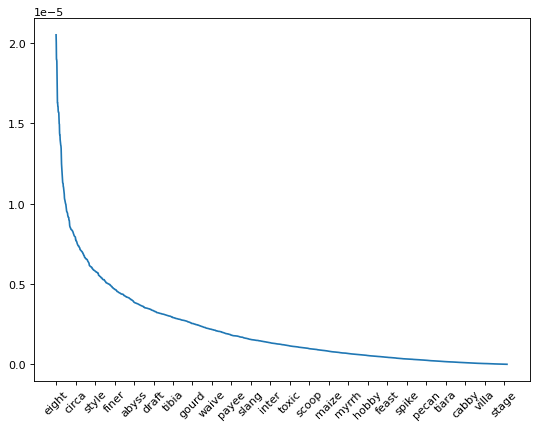

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(solWords, list(solWordProbs.values()))
plt.xticks(np.arange(0, len(solWords), 100), rotation = 45) # Only showing every 100th word
plt.show()

### Performance

In [10]:
avgAttemptsTotal = attemptsTotal / len(solWords)
avgAttemptsWins = attemptsWins / wins
print("Average Number of Attempts for All Games:", avgAttemptsTotal)
print("Average Number of Attempts for Only Winning Games:", avgAttemptsWins)
print("Total Number of Wins:", wins)
print("Win Percentage:", wins/len(solWords))

Average Number of Attempts for All Games: 3.9183585313174945
Average Number of Attempts for Only Winning Games: 3.875220458553792
Total Number of Wins: 2268
Win Percentage: 0.9796976241900648


## Version 3.0

* Using vector magnitude for each solution word instead of probability

In [11]:
# Compute embedding vectors for each letter
allLetters = stats.getLetterDistrubution(allWords)
solLetters = stats.getLetterDistrubution(solWords)

# Calculate word probabilities
allWordsMags = stats.getWordMagnitudes(allWords, allLetters)
solWordMags = stats.getWordMagnitudes(solWords, solLetters)

In [12]:
attemptsTotal = 0
attemptsWins = 0
wins = 0
randSample = random.sample(range(len(solWords)), len(solWords))

for randIndex in randSample:
    # Grab a random solution word
    randAnswer = solWords[randIndex]

    # Have player solve wordle
    states = []
    guesses = []
    for attempt in range(1, 7):
        guess = player.computeGuess(solWordMags, attempt, guesses, states)

        guesses.append(guess)

        outcome = player.solve(randAnswer, guess)

        states.append(outcome["verdict"])

        if outcome["win"]:
            wins += 1
            attemptsWins += len(states)
            break
    
    attemptsTotal += len(states)

#### Magnitude Distribution for Solution Words

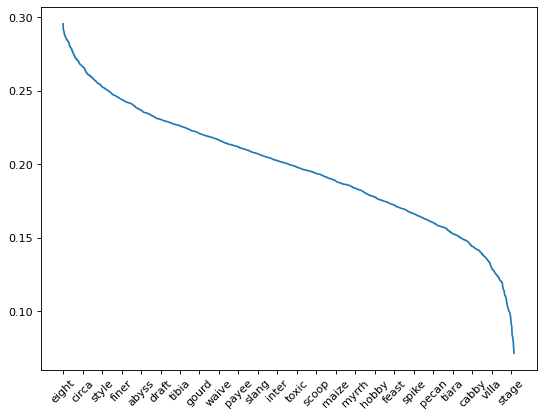

In [13]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(solWords, list(solWordMags.values()))
plt.xticks(np.arange(0, len(solWords), 100), rotation = 45) # Only showing every 100th word
plt.show()

#### Performance

In [14]:
avgAttemptsTotal = attemptsTotal / len(solWords)
avgAttemptsWins = attemptsWins / wins
print("Average Number of Attempts for All Games:", avgAttemptsTotal)
print("Average Number of Attempts for Only Winning Games:", avgAttemptsWins)
print("Total Number of Wins:", wins)
print("Win Percentage:", wins/len(solWords))

Average Number of Attempts for All Games: 3.9809935205183584
Average Number of Attempts for Only Winning Games: 3.930026572187777
Total Number of Wins: 2258
Win Percentage: 0.975377969762419
